Crime and weather

In [45]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

First I will read in both datasets as pandas dataframes

In [46]:
crimeDF= pd.read_csv("crime.csv", encoding='windows-1254')
weatherDF = pd.read_csv("weather_data_long.csv")


Quick look at the head of both dataframes to get a better idea of what I am working with

In [47]:

weatherDF.head()

,Date,Time,Temperature,DewPoint,Humidity,Wind,WinSpeed,WindGust,Pressure,Precip.,Condition
0,2002-01-01,12:53 AM,19,13,77,ENE,14,0,24.73,0.0,Cloudy
1,2002-01-02,12:53 AM,10,-3,56,SE,5,0,24.94,0.0,Mostly Cloudy
2,2002-01-04,12:53 AM,30,14,51,W,9,0,24.45,0.0,Partly Cloudy
3,2002-01-05,12:53 AM,25,18,75,CALM,0,0,24.74,0.0,Mostly Cloudy
4,2002-01-06,12:53 AM,23,9,55,SSE,13,0,24.74,0.0,Mostly Cloudy


In [48]:
crimeDF.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,1



Data prep for Denver weather

In [49]:
del weatherDF["WinSpeed"]
del weatherDF["Pressure"]
del weatherDF["Humidity"]
del weatherDF["Wind"]


In [50]:
weatherDF.isna().sum()


Date           0
Time           0
Temperature    0
DewPoint       0
WindGust       0
Precip.        0
Condition      4
dtype: int64

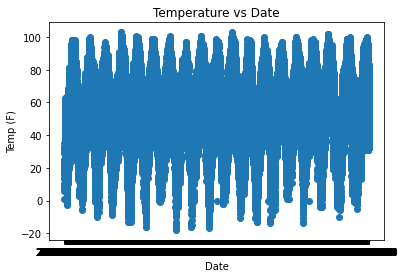

In [51]:
plt.scatter(weatherDF["Date"], weatherDF["Temperature"])
plt.title("Temperature vs Date")
plt.xlabel("Date")
plt.ylabel("Temp (F)")
plt.show()


<AxesSubplot:xlabel='Date'>

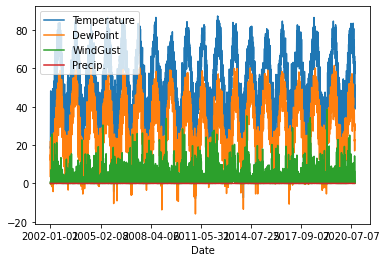

In [52]:
avgtemp = weatherDF.groupby([weatherDF['Date']]).mean()
avgtemp.plot()

Clean up and prep of Denver Crime

break down occurrence and report date into datetime objects

In [53]:
crimeDF["OCCURRENCE_DATE"] = pd.to_datetime(crimeDF["FIRST_OCCURRENCE_DATE"]).dt.date

crimeDF["OCCURRENCE_TIME"] = pd.to_datetime(crimeDF["FIRST_OCCURRENCE_DATE"]).dt.time

Now I am going to drop the columns that I do not need/columns that are incomplete: incidentID,offenseID, offense code, offense code extension, first occurrence date, last occurrence date, reported date, victim count as well as  geo x, geo y, geo lon, geo lat

In [ ]:
del crimeDF["incident_id"]
del crimeDF["offense_id"]
del crimeDF["OFFENSE_CODE"]
del crimeDF["OFFENSE_CODE_EXTENSION"]
del crimeDF["FIRST_OCCURRENCE_DATE"]
del crimeDF["LAST_OCCURRENCE_DATE"]
del crimeDF["REPORTED_DATE"]
del crimeDF["VICTIM_COUNT"]
del crimeDF["GEO_X"]
del crimeDF["GEO_Y"]
del crimeDF["GEO_LON"]
del crimeDF["GEO_LAT"]
del crimeDF["DISTRICT_ID"]
del crimeDF["PRECINCT_ID"]
del crimeDF["NEIGHBORHOOD_ID"]
del crimeDF["IS_CRIME"]
del crimeDF["IS_TRAFFIC"]

In [ ]:
crimeDF["Month"] = pd.DatetimeIndex(crimeDF["OCCURRENCE_DATE"]).month
crimeDF["Year"] = pd.DatetimeIndex(crimeDF["OCCURRENCE_DATE"]).year
crimeDF["Day"] = pd.DatetimeIndex(crimeDF["OCCURRENCE_DATE"]).day

In [ ]:
crimeDF.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,OCCURRENCE_DATE,OCCURRENCE_TIME,Month,Year,Day
0,criminal-mischief-other,public-disorder,2920 W 32ND AVE,2017-06-25,20:40:00,6,2017,25
1,criminal-mischief-other,public-disorder,13400 E ALBROOK DR,2017-05-26,19:00:00,5,2017,26
2,criminal-mischief-other,public-disorder,1600 BLOCK 16TH ST,2017-06-27,16:40:00,6,2017,27
3,criminal-mischief-other,public-disorder,2200 BLOCK MARKET ST,2017-05-26,19:01:00,5,2017,26
4,criminal-mischief-other,public-disorder,1733 N GROVE ST,2017-07-07,21:48:00,7,2017,7


Exploratory analysis

Count the amount of occurrences by offense type ID

theft-of-motor-vehicle       48016
theft-items-from-vehicle     37804
theft-other                  23157
criminal-mischief-mtr-veh    22113
theft-parts-from-vehicle     21258
                             ...  
explosives-posses                1
bigamy                           1
drug-barbiturate-mfr             1
theft-of-cable-services          1
gambling-betting-wagering        1
Name: OFFENSE_TYPE_ID, Length: 195, dtype: int64


Text(0, 0.5, 'Number of Occurrences')

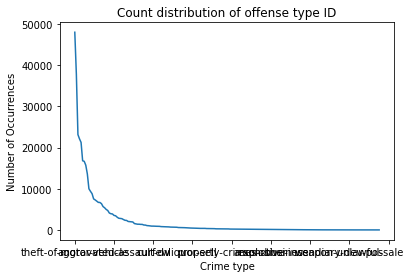

In [ ]:
# print(crimeDF["OFFENSE_TYPE_ID"].value_counts())
offenseType =(crimeDF["OFFENSE_TYPE_ID"].value_counts())
print(offenseType)
crimeDF.shape
ax = offenseType.plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")


# print(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
# print(crimeDF["DISTRICT_ID"].value_counts())
# print(crimeDF["PRECINCT_ID"].value_counts())
# print(crimeDF["NEIGHBORHOOD_ID"].value_counts())
# print(crimeDF["IS_CRIME"].value_counts())
# print(crimeDF["IS_TRAFFIC"].value_counts())

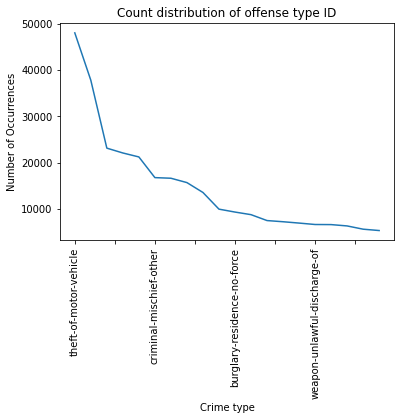

In [ ]:
res = crimeDF[~crimeDF['OFFENSE_TYPE_ID'].isin(offenseType[offenseType < 5000].index)]

# print(res)
ax = (res["OFFENSE_TYPE_ID"].value_counts()).plot(title="Count distribution of offense type ID")
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


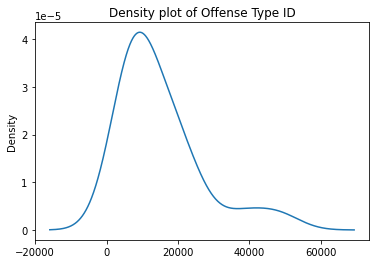

In [ ]:
ax2 =(res["OFFENSE_TYPE_ID"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

group by type: within type
offense category id

In [ ]:
offenseCategory =(crimeDF["OFFENSE_CATEGORY_ID"].value_counts())
print("Offense Types in Denver and Occurrence count")
print(offenseCategory)

Offense Types in Denver and Occurrence count
theft-from-motor-vehicle        59062
public-disorder                 58994
all-other-crimes                56996
larceny                         56282
auto-theft                      49040
burglary                        27482
other-crimes-against-persons    26470
drug-alcohol                    25619
aggravated-assault              17163
robbery                          7184
white-collar-crime               7061
sexual-assault                   4956
arson                             863
murder                            417
Name: OFFENSE_CATEGORY_ID, dtype: int64


<AxesSubplot:ylabel='Density'>

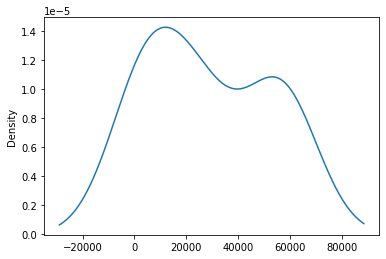

In [ ]:
offenseCategory.plot.kde()

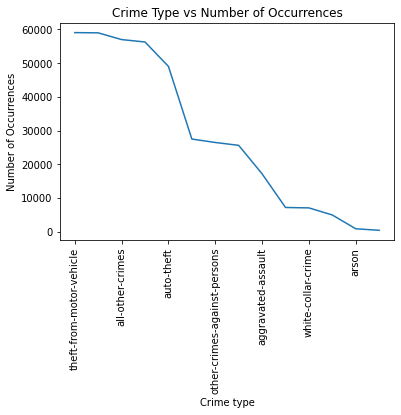

In [ ]:
ax = offenseCategory.plot(title="Crime Type vs Number of Occurrences")
plt.xticks(rotation=90)
ax.set_xlabel("Crime type")
ax.set_ylabel("Number of Occurrences")

plt.show()

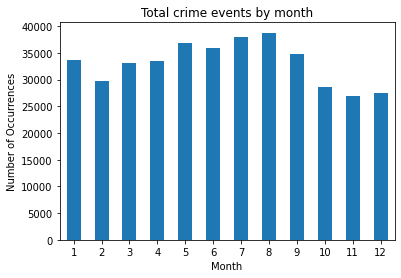

In [ ]:

ax = crimeDF.groupby("Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

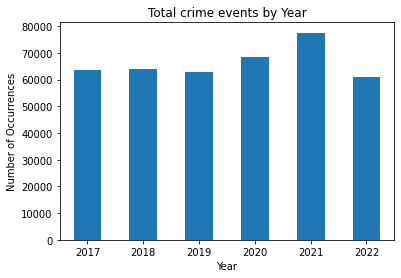

In [ ]:
ax = crimeDF.groupby("Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

Merging data on date of occurrence from crime and date from weather

weatherDF['Date']= pd.to_datetime()

In [ ]:
weatherDF["Month"] = pd.DatetimeIndex(weatherDF["Date"]).month
weatherDF["Year"] = pd.DatetimeIndex(weatherDF["Date"]).year
weatherDF["Day"] = pd.DatetimeIndex(weatherDF["Date"]).day
# weatherDF['Date']= pd.to_datetime()
weatherDF.head()

,Date,Time,Temperature,DewPoint,WindGust,Precip.,Condition,Month,Year,Day
0,2002-01-01,12:53 AM,19,13,0,0.0,Cloudy,1,2002,1
1,2002-01-02,12:53 AM,10,-3,0,0.0,Mostly Cloudy,1,2002,2
2,2002-01-04,12:53 AM,30,14,0,0.0,Partly Cloudy,1,2002,4
3,2002-01-05,12:53 AM,25,18,0,0.0,Mostly Cloudy,1,2002,5
4,2002-01-06,12:53 AM,23,9,0,0.0,Mostly Cloudy,1,2002,6


In [ ]:
print(weatherDF.dtypes)

Date            object
Time            object
Temperature      int64
DewPoint         int64
WindGust         int64
Precip.        float64
Condition       object
Month            int64
Year             int64
Day              int64
dtype: object


In [ ]:

print(crimeDF.dtypes)

OFFENSE_TYPE_ID        object
OFFENSE_CATEGORY_ID    object
INCIDENT_ADDRESS       object
OCCURRENCE_DATE        object
OCCURRENCE_TIME        object
Month                   int64
Year                    int64
Day                     int64
dtype: object


In [ ]:
crimeDF= crimeDF.dropna()
crimeDF.isna().sum()


OFFENSE_TYPE_ID        0
OFFENSE_CATEGORY_ID    0
INCIDENT_ADDRESS       0
OCCURRENCE_DATE        0
OCCURRENCE_TIME        0
Month                  0
Year                   0
Day                    0
dtype: int64

In [ ]:
weatherDF= weatherDF.dropna()
weatherDF.isna().sum()

Date           0
Time           0
Temperature    0
DewPoint       0
WindGust       0
Precip.        0
Condition      0
Month          0
Year           0
Day            0
dtype: int64

In [ ]:
crimeDF.rename(columns={'OCCURRENCE_DATE':'Date'},inplace =True)

In [ ]:
print(crimeDF.dtypes)
# print(weatherDF.dtypes)

OFFENSE_TYPE_ID        object
OFFENSE_CATEGORY_ID    object
INCIDENT_ADDRESS       object
Date                   object
OCCURRENCE_TIME        object
Month                   int64
Year                    int64
Day                     int64
dtype: object


In [ ]:
# weatherDF=weatherDF[~(weatherDF["Year"]<2017)]
# crimeDF= crimeDF[~(crimeDF["Year"]>2020)]

In [ ]:
mergeOnDate = pd.merge(crimeDF, weatherDF, how='outer',on='Date')

In [ ]:
mergeOnDate=mergeOnDate.dropna(subset=['OFFENSE_TYPE_ID'])
mergeOnDate=mergeOnDate.dropna(subset=['Temperature'])
mergeOnDate.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,Date,OCCURRENCE_TIME,Month_x,Year_x,Day_x,Time,Temperature,DewPoint,WindGust,Precip.,Condition,Month_y,Year_y,Day_y


In [ ]:
print(weatherDF.shape)
weatherdf= weatherDF.groupby(["Year","Month","Day"]).mean()
print(weatherdf.head())
print(weatherdf.shape)

(31147, 10)
                Temperature   DewPoint  WindGust  Precip.
Year Month Day                                           
2017 1     1      30.916667  16.041667     0.000      0.0
           2      27.583333  16.791667     2.125      0.0
           3      17.666667   9.333333     0.000      0.0
           4       8.125000   3.833333     0.000      0.0
           5       2.416667  -3.416667     0.000      0.0
(1297, 4)


In [ ]:

crimedf=crimeDF.groupby(["Year","Month", "Day","OFFENSE_CATEGORY_ID","OFFENSE_TYPE_ID"]).size()
# crimedf.rename(index={'OCCURRENCE_DATE':"Date"}, inplace=True)

crimedf.head()
# print(crimedf.shape)

Year  Month  Day  OFFENSE_CATEGORY_ID  OFFENSE_TYPE_ID       
2017  1      2    aggravated-assault   aggravated-assault         1
                                       menacing-felony-w-weap     2
                  all-other-crimes     contraband-possession      1
                                       criminal-trespassing      14
                                       health-violations          1
dtype: int64

In [ ]:
# crimeDF.shape
# crimeDF.info()
crimeDF.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,INCIDENT_ADDRESS,Date,OCCURRENCE_TIME,Month,Year,Day
0,criminal-mischief-other,public-disorder,2920 W 32ND AVE,2017-06-25,20:40:00,6,2017,25
1,criminal-mischief-other,public-disorder,13400 E ALBROOK DR,2017-05-26,19:00:00,5,2017,26
2,criminal-mischief-other,public-disorder,1600 BLOCK 16TH ST,2017-06-27,16:40:00,6,2017,27
3,criminal-mischief-other,public-disorder,2200 BLOCK MARKET ST,2017-05-26,19:01:00,5,2017,26
4,criminal-mischief-other,public-disorder,1733 N GROVE ST,2017-07-07,21:48:00,7,2017,7


Group rows together by date, the offense category and the offense type

In [ ]:
crimedf.describe()

count    69491.000000
mean         3.666647
std          4.231818
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         79.000000
dtype: float64

In [ ]:

weatherdf.to_csv("weatherDenverClean.csv")
CRIMEDF.to_csv("crimeDenverClean.csv")

    

NameError: name 'CRIMEDF' is not defined

In [ ]:
crimeWeatherDF = pd.merge(weatherdf,crimedf,how="outer", on= "Date")


drop where temp is na

Works Cited:
https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee 
https://towardsdatascience.com/analysis-of-nyc-reported-crime-data-using-pandas-821753cd7e22


crimeDF